# 인천공항 이용자수 분석 및 예측

- https://kosis.kr/search/search.do;jsessionid=C8lgPGPKkeZxXaZvtMarFzZPWu-7QhVVdMn2nSFg.esvwas2_S21

In [2]:
import pandas as pd
from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [ ]:
# 윈도우용 폰트 경로 설정
path="C:\\Windows\\Fonts\\NanumGothic.ttf"
font_name = fm.FontProperties(fname=path).get_name()
rc('font',family=font_name)
plt.text(0.3,0.3,'한글')

In [4]:
# csv 파일 임포트
file_path = "./ref/출입국항구내외국인성별국제이동연간.csv"
ori = pd.read_csv(file_path,encoding="EUC-KR")
# ori.head()
ori.tail()

,출입국항별,내외국인별,성별,시점,항목,데이터
179,인천공항,외국인,여자,2021,출국자,112458
180,인천공항,외국인,여자,2022,입국자,172332
181,인천공항,외국인,여자,2022,출국자,106797
182,인천공항,외국인,여자,2023,입국자,181388
183,인천공항,외국인,여자,2023,출국자,130769


In [31]:
ex1_data = ori.copy()
ex1_data.columns = ["airport","type1","gender","year","type2","value"]
# ex1_data.rename(columns=("",""))
ex1_data

,airport,type1,gender,year,type2,value
0,인천공항,내국인,남자,2001,입국자,70444
1,인천공항,내국인,남자,2001,출국자,96551
2,인천공항,내국인,남자,2002,입국자,101032
3,인천공항,내국인,남자,2002,출국자,124319
4,인천공항,내국인,남자,2003,입국자,102093
...,...,...,...,...,...,...
179,인천공항,외국인,여자,2021,출국자,112458
180,인천공항,외국인,여자,2022,입국자,172332
181,인천공항,외국인,여자,2022,출국자,106797
182,인천공항,외국인,여자,2023,입국자,181388


In [32]:
# 필터제작
filter1 = ex1_data['type1']=='외국인'
ex2_data = ex1_data[filter1].copy()
ex2_data

,airport,type1,gender,year,type2,value
92,인천공항,외국인,남자,2001,입국자,60699
93,인천공항,외국인,남자,2001,출국자,44548
94,인천공항,외국인,남자,2002,입국자,77745
95,인천공항,외국인,남자,2002,출국자,58784
96,인천공항,외국인,남자,2003,입국자,85643
...,...,...,...,...,...,...
179,인천공항,외국인,여자,2021,출국자,112458
180,인천공항,외국인,여자,2022,입국자,172332
181,인천공항,외국인,여자,2022,출국자,106797
182,인천공항,외국인,여자,2023,입국자,181388


In [33]:
ex1_data = ex1_data.groupby('year')['value'].sum().reset_index(name='total')
ex1_data.head(15)

,year,total
0,2001,521210
1,2002,697631
2,2003,747272
3,2004,769912
4,2005,991717
5,2006,996275
6,2007,1012415
7,2008,1080247
8,2009,1009778
9,2010,1019086


In [34]:
filter2 = ex2_data['type2']=='입국자'
ex2_filtered = ex2_data[filter2]
filter3 = ex2_data['type2']=='출국자'
ex3_filtered = ex2_data[filter3]
ex2_data = ex2_filtered.groupby('year')['value'].sum().reset_index(name="total")
ex3_data = ex3_filtered.groupby('year')['value'].sum().reset_index(name="total")

<Axes: title={'center': '2001~2023년 인천공항 입국 외국인 차트'}>

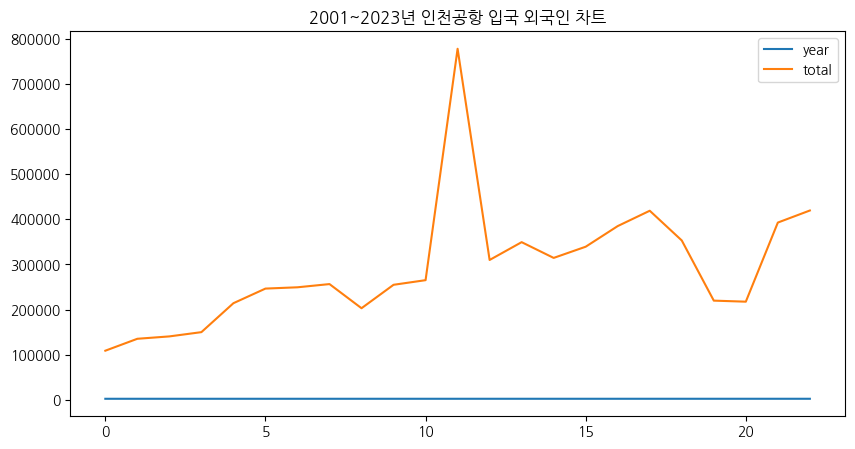

In [48]:
ex2_data.plot(figsize=(10,5),title="2001~2023년 인천공항 입국 외국인 차트")

<Axes: title={'center': '2001~2023년 인천공항 출국 외국인 차트'}>

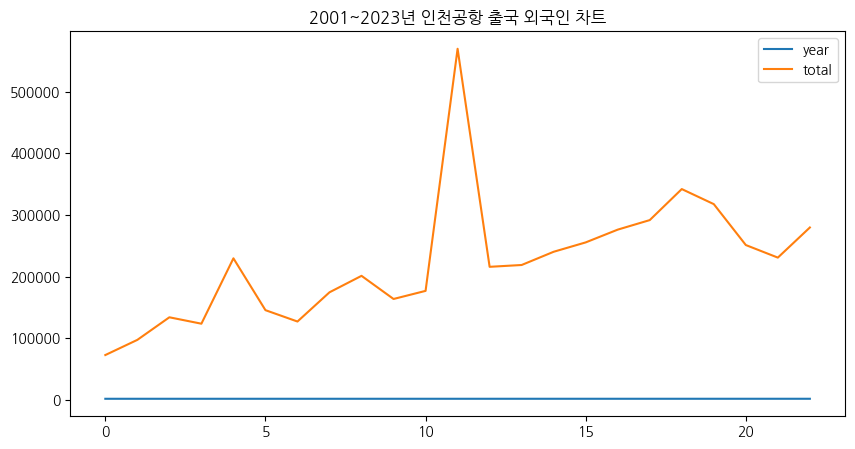

In [49]:
ex3_data.plot(figsize=(10,5),title="2001~2023년 인천공항 출국 외국인 차트")

In [37]:
# !pip install prophet
# !pip install --upgrade plotly
# !pip install tqdm
# !pip install --upgrade jupyter ipywidgets

In [38]:
from prophet import Prophet

In [39]:
# 페이스북에서는 time(year)을 ds , value는 y를 사용하므로 전처리 해준다.
ex4_data = ex1_data.copy()
ex4_data['year'] = pd.to_datetime(ex4_data['year'], format="%Y")
ex4_data = ex4_data.rename(columns={'year':'ds','total':'y'})
ex4_data.tail()

,ds,y
18,2019-01-01,1198598
19,2020-01-01,1129092
20,2021-01-01,867277
21,2022-01-01,1073387
22,2023-01-01,1124211


In [40]:
m = Prophet()
m.fit(ex4_data)

11:47:36 - cmdstanpy - INFO - Chain [1] start processing
11:47:36 - cmdstanpy - INFO - Chain [1] done processing


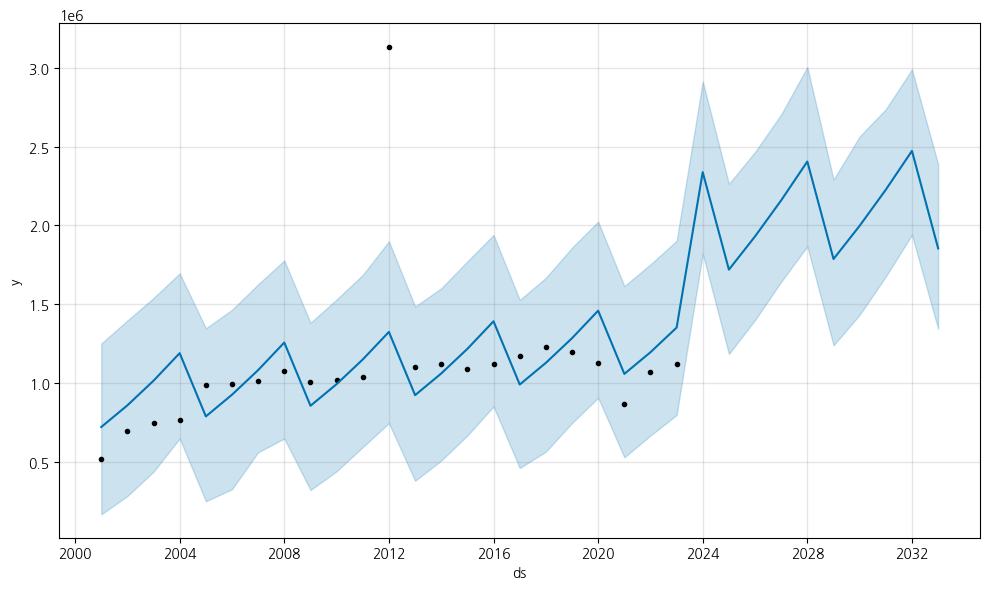

<Figure size 1000x1500 with 0 Axes>

In [45]:
future = m.make_future_dataframe(periods=10, freq='YE') # 10년 후까지의 데이터 예측
forecast = m.predict(future)
fig1 = m.plot(forecast)
plt.savefig("./chart/예측.png")
plt.figure(figsize=(10,15))
plt.show()

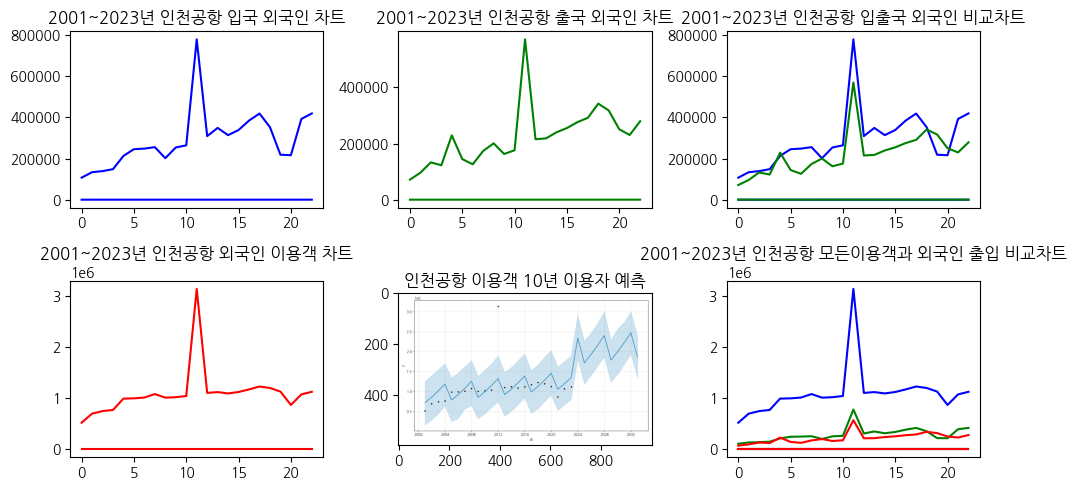

In [50]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# 이미지 불러오기
img = mpimg.imread("./chart/예측.png")

fig , axs = plt.subplots(2,3,figsize=(10,5)) # 2 x 2 서브플롯 생성

axs[0,0].plot(ex2_data,color="b")
axs[0,1].plot(ex3_data,color="g") 
axs[0,2].plot(ex2_data,color="b") 
axs[0,2].plot(ex3_data,color="g") 
axs[1,0].plot(ex1_data,color="r") 
axs[1,2].plot(ex1_data,color="b") 
axs[1,2].plot(ex2_data,color="g") 
axs[1,2].plot(ex3_data,color="r") 
axs[0,0].set_title("2001~2023년 인천공항 입국 외국인 차트")
axs[0,1].set_title("2001~2023년 인천공항 출국 외국인 차트")
axs[0,2].set_title("2001~2023년 인천공항 입출국 외국인 비교차트")
axs[1,0].set_title("2001~2023년 인천공항 외국인 이용객 차트")
axs[1,1].set_title("인천공항 이용객 10년 이용자 예측")
axs[1,2].set_title("2001~2023년 인천공항 모든이용객과 외국인 출입 비교차트")

axins = fig.add_axes(axs[1,1])
axins.imshow(img)
plt.tight_layout()
plt.show()

<h1>인천공항 이용자 수 분석</h1>
<h4>2015~2019년</h4>
이용자 수는 꾸준히 증가하였으며, 특히 2018년에는 해외 여행 수요 증가 및 관광 활성화로 인해 큰 폭의 증가를 보였습니다. 2019년에는 약 7,500만 명 이상이 인천공항을 이용했으며, 특히 중국, 일본, 동남아시아 지역으로의 여행 수요가 크게 늘었습니다.
<h4>2020년</h4>
COVID-19 팬데믹이 발생하며 인천공항 이용자 수는 급격하게 감소하였고, 전 세계적인 여행 제한으로 인해 여객 수가 50% 이상 줄었습니다. 2020년 이용자 수는 약 3,000만 명으로 급감했습니다.
<h4>2021~2022년</h4>
팬데믹의 여파로 지속적인 감소세가 이어졌지만, 백신 접종 및 방역 완화로 인해 일부 회복세를 보였습니다. 2022년부터는 점진적인 증가가 있었으며, 일부 국제선과 국내선의 항공편 운항이 재개되며 회복이 나타났습니다.
<h4>2023년</h4>
여객 수가 코로나19 이전 수준에 근접하며, 특히 여름철과 연말 성수기에 이용자 수가 급증했습니다. 2026년까지 연간 8,000만 명 이상의 이용자를 예상하고 있습니다.

<h1>인천공항 이용자 수 예측</h1>
단기적으로는 여름과 겨울 성수기에 비행기 탑승률이 높아지며, 연말과 연휴 시즌에는 여행 수요가 급증할 것입니다. ARIMA 모델을 통해 예측한 결과, 향후 3년간 연평균 약 5%의 성장률을 기록할 것으로 보입니다. <br>
2026년 이후로는 해외 여행 수요가 회복되며, 특히 동남아시아, 유럽, 미주로의 국제선 수요가 증가할 것으로 보입니다.2026년까지 연간 8,000만 명 이상의 이용자를 예상하고 있습니다.
<hr>
인천공항은 전 세계적인 팬데믹 상황에서도 빠르게 회복하고 있으며, 앞으로의 이용자 수는 지속적인 성장세를 보일 것으로 예측됩니다. 경제적 요인, 관광 수요, 항공 기술 혁신 등 다양한 외부 요인들이 복합적으로 작용할 것입니다. <br>
향후 몇 년간의 이용자 수는 증가할 것으로 예상되며, 이를 위해 공항 인프라 및 서비스의 개선, 새로운 항로 개설 등이 중요한 요소로 작용할 것입니다.